In [1]:
# Title of Assignment-2:
#     Implementing Feedforward neural networks with Keras and TensorFlow
#     a. Import the necessary packages
#     b. Load the training and testing data (MNIST)
#     c. Define the network architecture using Keras
#     d. Train the model using SGD
#     e. Evaluate the network
#     f. Plot the training loss and accuracy

In [4]:
 # 1) Importing libraries

import tensorflow as tf

In [5]:
from tensorflow import keras

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')

In [8]:
# 2) Loading and preparing the data
# MNIST stands for “Modified National Institute of Standards and Technology”. 
# It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels 
# i.e. about 784 features. Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black). 
# This database is further divided into 60,000 training and 10,000 testing images.


In [9]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
#to see length of training dataset
len(x_train)

60000

In [11]:
##to see length of testing dataset
len(x_test)

10000

In [12]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [13]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [14]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

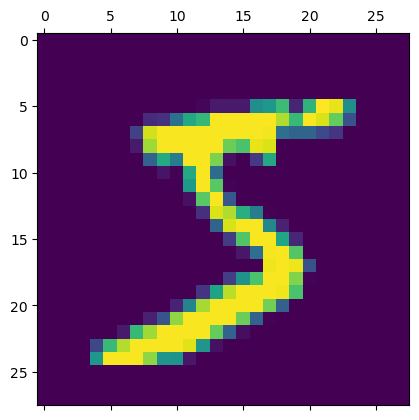

In [15]:
#to see how first image look
plt.matshow(x_train[0])

In [16]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [17]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
 #3) Define the network architecture using Keras
    # Creating the model

# The ReLU function is one of the most popular activation functions. 
# It stands for “rectified linear unit”. Mathematically this function is defined as:
# y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if 
# the input is positive.
# 
# The softmax function is another activation function. 
# It changes input values into values that reach from 0 to 1.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
 # Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
 # Train the model
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6511 - accuracy: 0.8385 - val_loss: 0.3556 - val_accuracy: 0.9044
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3371 - accuracy: 0.9056 - val_loss: 0.2948 - val_accuracy: 0.9195
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2885 - accuracy: 0.9184 - val_loss: 0.2630 - val_accuracy: 0.9272
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2583 - accuracy: 0.9265 - val_loss: 0.2400 - val_accuracy: 0.9324
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2360 - accuracy: 0.9332 - val_loss: 0.2209 - val_accuracy: 0.9373
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2181 - accuracy: 0.9383 - val_loss: 0.2054 - val_accuracy: 0.9405
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2032 - accuracy: 0.9437 - val_loss: 0.1931 - val_accuracy

In [24]:
 # 4)  Evaluate the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.9514
Loss=0.166
Accuracy=0.951


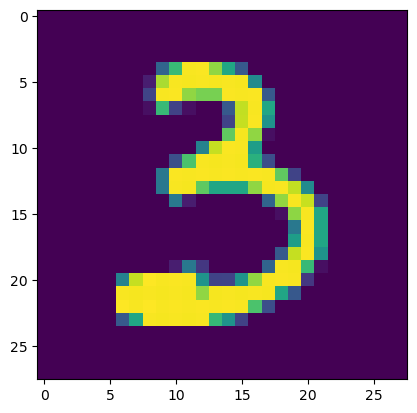

In [25]:
# Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [26]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 3


In [27]:
# 5)  Plot graph for Accuracy and Loss
get_ipython().run_line_magic('pinfo2', 'history.history')

In [28]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

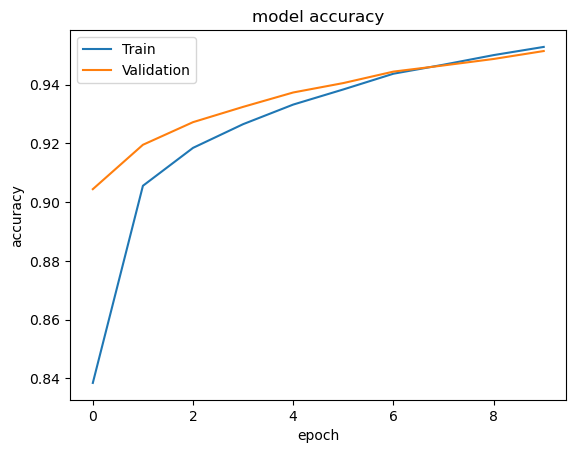

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

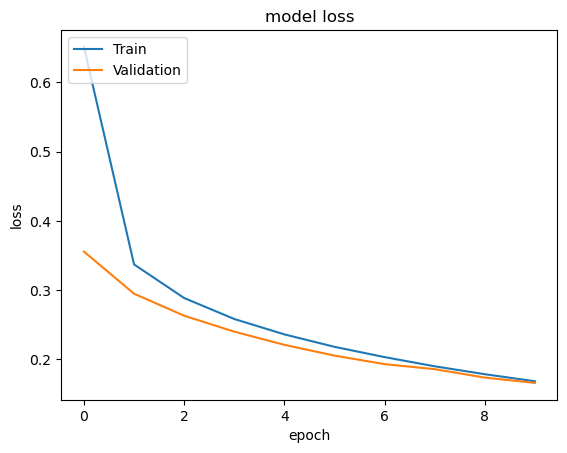

In [30]:
# graph representing the model’s accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

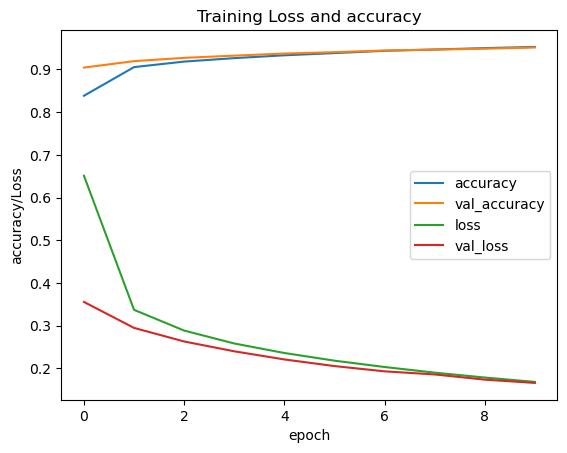

In [31]:
# graph represents the model’s loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()


In [ ]:
# Conclusion: With above code We can see, that throughout the epochs, our model accuracy 
#     increases and our model loss decreases,that is good since our model gains confidence
#     with its predictions.
#     
#     1. The two losses (loss and val_loss) are decreasing and the accuracy 
#        (accuracy and val_accuracy)are increasing. 
#         So this indicates the model is trained in a good way.
# 
#     2. The val_accuracy is the measure of how good the predictions of your model are. 
#        So In this case, it looks like the model is well trained after 10 epochs